In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path = "D:/IB/Telemedycyna/projekt-telemed/dane/50m1/Accelerometer.csv"
acc = pd.read_csv(path)

acc.head()

,time,seconds_elapsed,z,y,x
0,1714095579402919200,0.052919,1.315238,1.416456,-1.522145
1,1714095579412994800,0.062995,0.525788,1.004374,-1.374369
2,1714095579423070700,0.073071,0.518494,0.800883,-1.025968
3,1714095579433146600,0.083147,1.516772,0.646994,-0.800483
4,1714095579443222500,0.093222,2.669097,0.355775,-0.612014


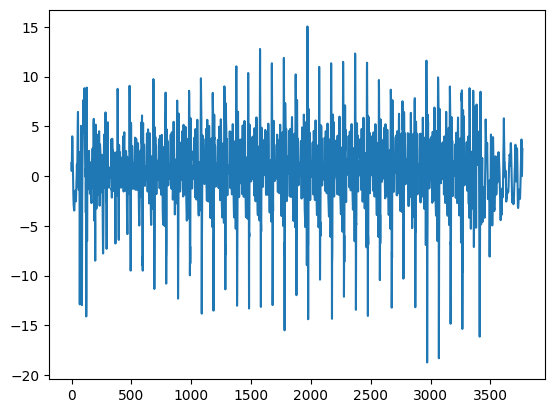

In [60]:
time = acc['seconds_elapsed'].values
x = acc['x'].values
y = acc['y'].values
z = acc['z'].values

#z tego wykresu można wybrać jakie wartości z osi x nas interesują
plt.plot(z)

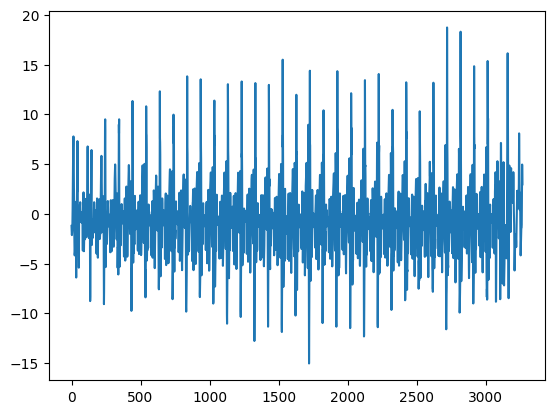

In [61]:
z2 = z[250:-250]
t2 = time[250:-250]
z2 = -z2
plt.plot(z2)

Liczba kroków przed filtracją:  52


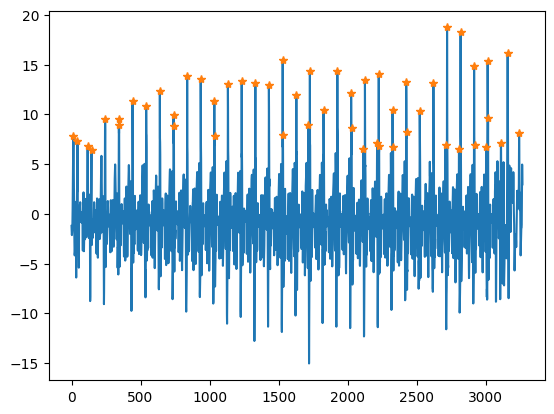

In [62]:
from scipy.signal import find_peaks

meanz2 = np.mean(z2)
devz2 = np.std(z2)

peaksz2, _ = find_peaks(z2, height=meanz2+2*devz2)
print("Liczba kroków przed filtracją: ", len(peaksz2),)
plt.plot(z2)
plt.plot(peaksz2, z2[peaksz2], "*")

C:\Users\olate\AppData\Roaming\Python\Python312\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\olate\AppData\Roaming\Python\Python312\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, "Wartości 'z' w domenie częstotliwości")

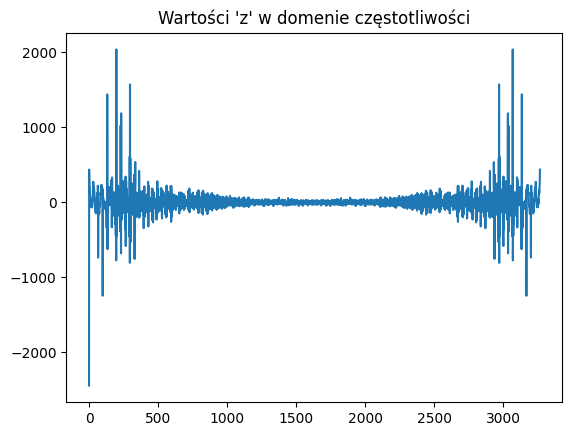

In [63]:
Fs = 1000
fft_z = np.fft.fft(z2)

#z tego wykresu wybieramy jakie częstotliwości są zakłóceniami
plt.plot(fft_z)
plt.title("Wartości 'z' w domenie częstotliwości")

Text(0.5, 1.0, "Sygnał 'z' po filtracji")

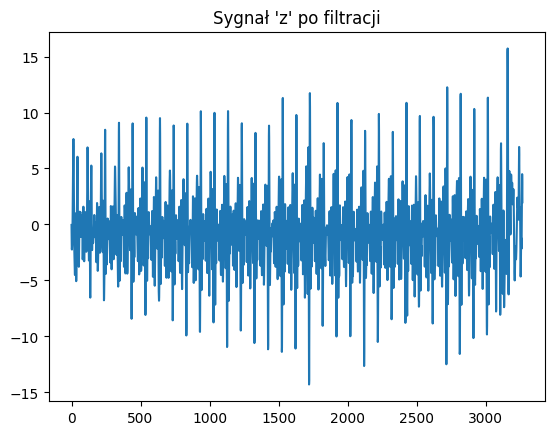

In [64]:
Fs = 1000
fft_z = np.fft.fft(z2)
f = np.fft.fftfreq(len(t2), 1/Fs)

fft_sygnal_filtr = fft_z.copy()

#maska = (np.abs(f) > 50)
maska = ((np.abs(f) > 150))
fft_sygnal_filtr[maska] = 0


z_filtered = np.fft.ifft(fft_sygnal_filtr)

plt.plot(z_filtered)
plt.title("Sygnał 'z' po filtracji")

Wyznaczona liczba kroków po filtracji:  36


C:\Users\olate\AppData\Roaming\Python\Python312\site-packages\scipy\signal\_peak_finding.py:266: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


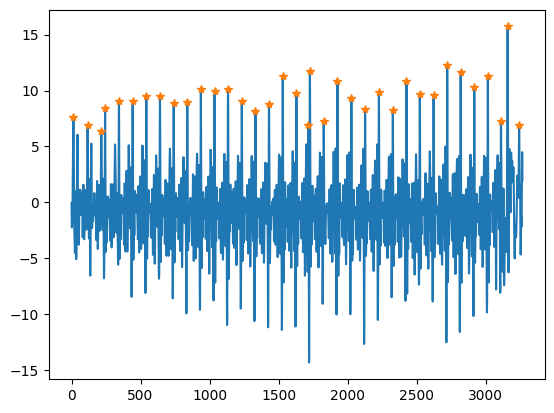

In [65]:
mean = np.mean(z_filtered)
dev = np.std(z_filtered)
#nagrane zostało 20 kroków

step_num, _ = find_peaks(z_filtered, height=mean+2*dev)
print("Wyznaczona liczba kroków po filtracji: ", len(step_num))


plt.plot(z_filtered)
plt.plot(step_num, z_filtered[step_num], "*")

Wyznaczanie prędkości

In [66]:
distance = 50
time = len(t2)/100 #chyba to jest wyznaczenie czasu w sekundach
print(time)

32.68


In [67]:
#średnia prędkość całkowita
total_speed = distance/time
print(np.round(total_speed, 5), "m/s")

1.52999 m/s


In [83]:
step_distance = np.zeros(len(step_num)-1)
step_speed = np.zeros(len(step_num)-1)
step_time = np.zeros(len(step_num)-1)
length = np.linspace(0, 50, len(step_num)) #oszacowałam długość kroku na 50m/ilość kroków

for i in range(0, len(step_num)-1):
    #step_distance[i] = step_num[i+1]-step_num[i]
    step_distance[i] = length[i+1] - length[i]
    step_time[i] = t2[step_num[i+1]] - t2[step_num[i]]
    step_speed[i] = step_distance[i]/step_time[i]

#tutaj jest wyznaczona prędkość każdego kroku
print(step_speed)

[ 1.39001613  1.41781562  5.06363353  1.41781528  1.43213533  1.43213463
  1.43213358  1.43213218  1.43213183  1.44674367  1.43212902  1.44674153
  1.41780635  1.43212657  1.44673938  1.41780428  1.44673867  1.62966065
 12.8891486   1.41780566  1.41780703  1.40376967  1.43213008  1.41780978
  1.4037727   1.43213288  1.46166187  1.43213323  1.43213218  1.44674475
  1.44674475  1.43212973  1.49242849  2.95376322  1.70819942]


In [84]:
#to jest zły plik, bo dla oryginalnego nie było lokalizacji
path = "D:/IB/Telemedycyna/projekt-telemed/dane/40/Location.csv"
loc = pd.read_csv(path)

sensor_speed = loc['speed'].values


In [86]:
s = 0
for i in range(0, len(sensor_speed)):
    s = s+ sensor_speed[i]
avg_sensor_speed = s/(len(sensor_speed))
print(avg_sensor_speed)

1.1933024440217634


In [88]:
sensor_step_speed = np.zeros(len(step_num)-1)

for i in range(0, len(step_num)-1):
    sensor_step_speed[i] = sensor_speed[step_num[i+1]] - sensor_speed[step_num[i]]

#to jest prędkość każdego kroku wg aplikacji
print(sensor_step_speed)


IndexError: index 116 is out of bounds for axis 0 with size 58